In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pymc3 as pm

lengths = np.array([195,182])

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject


$$
P(\theta | D) = \frac{p(D|\theta)p(\theta)}{p(D)}
$$

Parameters: $\theta$  
Data points: $D$  
Posterior: $p(\theta | D)$  
Likelihood: $p(D | \theta)$  
evidence: $p(D) = \int_\theta p(d|\theta)p(\theta) d\theta$  

We assume gaussians for weights: $\theta = \{\mu, \sigma\}$

In [25]:
mu = np.linspace(150, 250)
sigma = np.linspace(0, 15)[::-1]

mm, ss = np.meshgrid(mu, sigma)


Text(0, 0.5, '$\\sigma$')

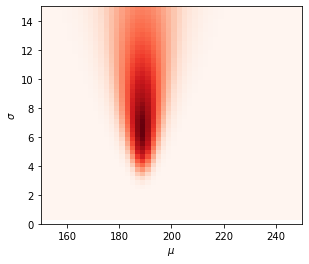

In [26]:
likelihood = stats.norm(mm, ss).pdf(length[0]) * stats.norm(mm, ss).pdf(lengths[1])
aspect = mm.max() / ss.max() / 3
extent = [mm.min(), mm.max(), ss.min(), ss.max()]

plt.imshow(likelihood, cmap='Reds', aspect=aspect, extent=extent)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

Text(0, 0.5, '$\\sigma$')

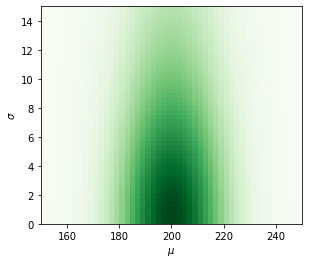

In [45]:
prior = stats.norm(200, 15).pdf(mm) * stats.cauchy(0, 10).pdf(ss)
plt.imshow(prior, cmap='Greens', aspect=aspect, extent=extent)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

Text(0, 0.5, '$\\sigma$')

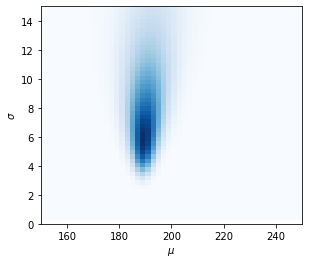

In [46]:
unnormalized_posterior = prior * likelihood
posterior = unnormalized_posterior / np.nan_to_num(unnormalized_posterior).sum()
plt.imshow(posterior, cmap='Blues', aspect=aspect, extent=extent)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

/tmp/ipykernel_43357/1829927598.py:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(draws=10_000, chains=1)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]


Sampling 1 chain for 1_000 tune and 10_000 draw iterations (1_000 + 10_000 draws total) took 4 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


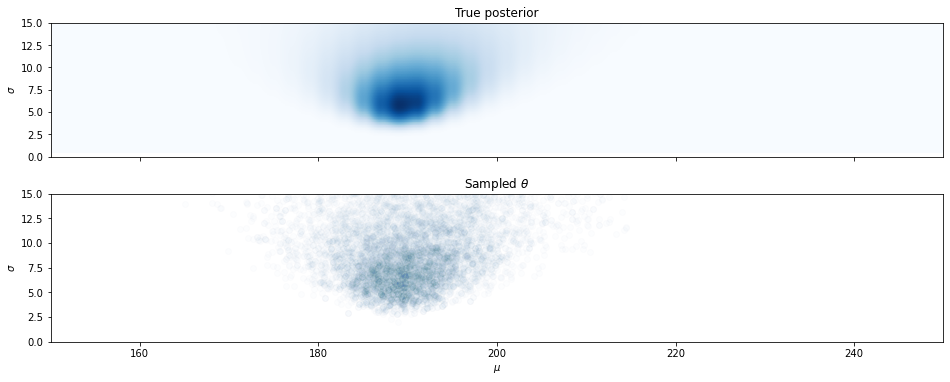

In [48]:
with pm.Model():
    mu = pm.Normal('mu', mu=200, sd=15)
    sigma = pm.HalfCauchy('sigma', 10)
    
    observed = pm.Normal('observed', mu=mu, sd=sigma, observed=lengths)
    trace = pm.sample(draws=10_000, chains=1)
    
    fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize = (16, 6))
    axes[0].imshow(posterior, cmap='Blues', extent=extent, aspect=1)
    axes[0].set_ylabel('$\sigma$')
    axes[1].scatter(trace['mu'], trace['sigma'], alpha=0.01)
    axes[1].set_ylabel('$\sigma$')
    axes[0].set_title('True posterior')
    axes[1].set_title('Sampled $\\theta$')
    plt.xlabel('$\mu$')
    plt.xlim(150, mm.max())
    plt.ylim(0, ss.max())